# Clustering

In [69]:
import pandas as pd
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

># Data Preprocessing

### Merge Datasets

In [72]:
merged_data = pd.merge(transactions, customers, on='CustomerID')


### Check for missing data

In [74]:
merged_data.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

### Date Formatting

In [76]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

### Aggregation

In [78]:
customer_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count',
    'ProductID': 'nunique',
    'Quantity': 'sum',
    'TransactionDate': 'max',
    'SignupDate': 'min'
}).reset_index()

### Renaming

In [80]:
customer_data.columns = ['CustomerID', 'TotalSpend','AvgTransaction','Frequency', 'UniqueProducts',
                               'Quantity', 'TransactionDate','SignupDate']

### Merging Columns

In [82]:
customer_data = customer_data.merge(customers[['CustomerID', 'Region']], on='CustomerID')

>## Calculate Recency and Lifetime

In [84]:
# Days since last purchase
customer_data['Recency'] = (pd.to_datetime('today') - customer_data['TransactionDate']).dt.days

# diff between last purchase and signup
customer_data['Lifetime'] = (customer_data['TransactionDate']  - customer_data['SignupDate']).dt.days
customer_data

,CustomerID,TotalSpend,AvgTransaction,Frequency,UniqueProducts,Quantity,TransactionDate,SignupDate,Region,Recency,Lifetime
0,C0001,3354.52,670.904000,5,5,12,2024-11-02 17:04:16,2022-07-10,South America,87,846
1,C0002,1862.74,465.685000,4,4,10,2024-12-03 01:41:41,2022-02-13,Asia,57,1024
2,C0003,2725.38,681.345000,4,4,14,2024-08-24 18:54:04,2024-03-07,South America,157,170
3,C0004,5354.88,669.360000,8,8,23,2024-12-23 14:13:52,2022-10-09,South America,36,806
4,C0005,2034.24,678.080000,3,3,7,2024-11-04 00:30:22,2022-08-15,Asia,86,812
...,...,...,...,...,...,...,...,...,...,...,...
194,C0196,4982.88,1245.720000,4,3,12,2024-12-15 03:43:35,2022-06-07,Europe,45,922
195,C0197,1928.65,642.883333,3,3,9,2024-12-27 18:20:31,2023-03-21,Europe,32,647
196,C0198,931.83,465.915000,2,2,3,2024-10-04 18:31:12,2022-02-27,Europe,116,950
197,C0199,1979.28,494.820000,4,4,9,2024-10-26 00:01:58,2022-12-03,Europe,95,693


>## Numerical Features

In [86]:
numerical_features = ['TotalSpend','AvgTransaction', 'Frequency', 'UniqueProducts', 'Quantity', 'Recency', 'Lifetime']

### Standardaization

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data[numerical_features] = scaler.fit_transform(customer_data[numerical_features])

>## Categorical Features

### One-hot encode

In [91]:
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)
customer_data

,CustomerID,TotalSpend,AvgTransaction,Frequency,UniqueProducts,Quantity,TransactionDate,SignupDate,Recency,Lifetime,Region_Europe,Region_North America,Region_South America
0,C0001,-0.061701,-0.070263,-0.011458,0.050047,-0.122033,2024-11-02 17:04:16,2022-07-10,-0.264314,1.171689,False,False,True
1,C0002,-0.877744,-0.934933,-0.467494,-0.424204,-0.448000,2024-12-03 01:41:41,2022-02-13,-0.688496,1.703268,False,False,False
2,C0003,-0.405857,-0.026271,-0.467494,-0.424204,0.203934,2024-08-24 18:54:04,2024-03-07,0.725443,-0.847117,False,False,True
3,C0004,1.032547,-0.076769,1.356650,1.472798,1.670787,2024-12-23 14:13:52,2022-10-09,-0.985423,1.052233,False,False,True
4,C0005,-0.783929,-0.040028,-0.923530,-0.898455,-0.936951,2024-11-04 00:30:22,2022-08-15,-0.278454,1.070152,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,C0196,0.829053,2.351666,-0.467494,-0.898455,-0.122033,2024-12-15 03:43:35,2022-06-07,-0.858169,1.398655,True,False,False
195,C0197,-0.841689,-0.188326,-0.923530,-0.898455,-0.610984,2024-12-27 18:20:31,2023-03-21,-1.041981,0.577396,True,False,False
196,C0198,-1.386975,-0.933964,-1.379566,-1.372705,-1.588886,2024-10-04 18:31:12,2022-02-27,0.145728,1.482275,True,False,False
197,C0199,-0.813993,-0.812176,-0.467494,-0.424204,-0.610984,2024-10-26 00:01:58,2022-12-03,-0.151199,0.714770,True,False,False


># Feature Selection

In [93]:
features = customer_data[numerical_features + [col for col in customer_data.columns if col.startswith('Region_')]]
features

,TotalSpend,AvgTransaction,Frequency,UniqueProducts,Quantity,Recency,Lifetime,Region_Europe,Region_North America,Region_South America
0,-0.061701,-0.070263,-0.011458,0.050047,-0.122033,-0.264314,1.171689,False,False,True
1,-0.877744,-0.934933,-0.467494,-0.424204,-0.448000,-0.688496,1.703268,False,False,False
2,-0.405857,-0.026271,-0.467494,-0.424204,0.203934,0.725443,-0.847117,False,False,True
3,1.032547,-0.076769,1.356650,1.472798,1.670787,-0.985423,1.052233,False,False,True
4,-0.783929,-0.040028,-0.923530,-0.898455,-0.936951,-0.278454,1.070152,False,False,False
...,...,...,...,...,...,...,...,...,...,...
194,0.829053,2.351666,-0.467494,-0.898455,-0.122033,-0.858169,1.398655,True,False,False
195,-0.841689,-0.188326,-0.923530,-0.898455,-0.610984,-1.041981,0.577396,True,False,False
196,-1.386975,-0.933964,-1.379566,-1.372705,-1.588886,0.145728,1.482275,True,False,False
197,-0.813993,-0.812176,-0.467494,-0.424204,-0.610984,-0.151199,0.714770,True,False,False


># K-Means Clustering

### Variables Intialisation

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,calinski_harabasz_score
optimal_clusters = None
optimal_k = 0
min_db_index = float('inf')

db_scores = []
inertias = []
ch_scores = []

## Testing with different number of clusters

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(features)
    
    db_index = davies_bouldin_score(features, cluster_labels)
    db_scores.append(db_index)
    ch_scores.append(calinski_harabasz_score(features, cluster_labels))
    inertias.append(kmeans.inertia_)
    
    # optimal k based on Davies-Bouldin Index
    if db_index < min_db_index:
        min_db_index = db_index
        optimal_clusters = cluster_labels
        optimal_k = k

# Add optimal cluster labels to the dataset
customer_data['Cluster'] = optimal_clusters
print(f"Optimal Number of Clusters: {optimal_k}")

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Optimal Number of Clusters: 3


### Davies-Bouldin Index vs. Number of Clusters

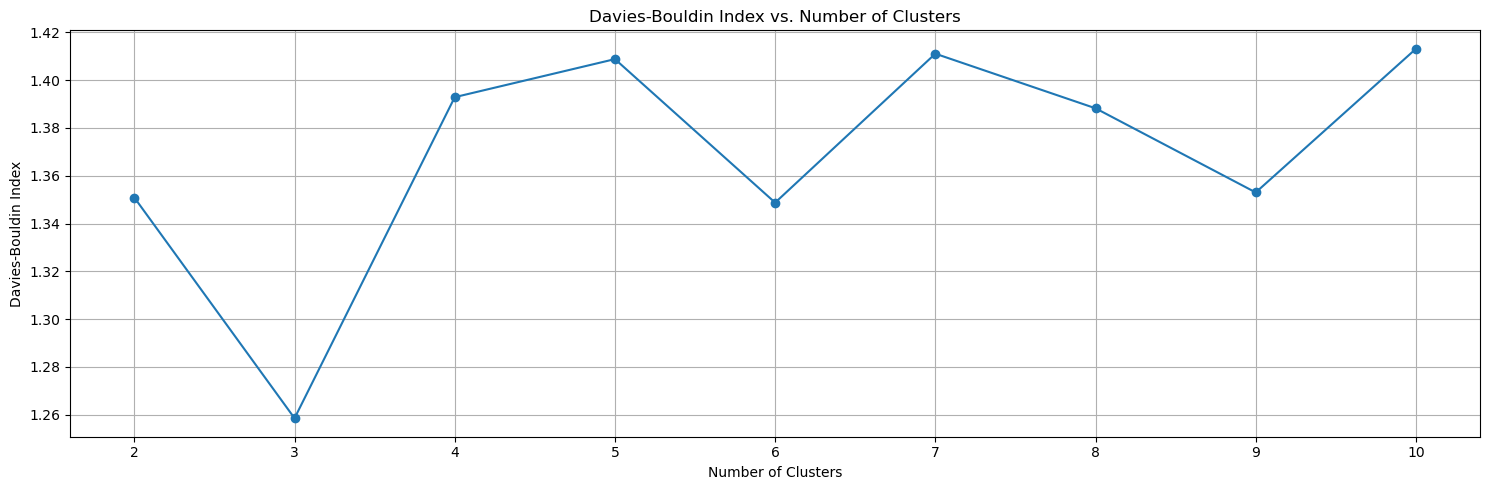

In [100]:
plt.figure(figsize=(15,5))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.grid() 
plt.tight_layout()
plt.show()

### Inertias (Elbow Plot)

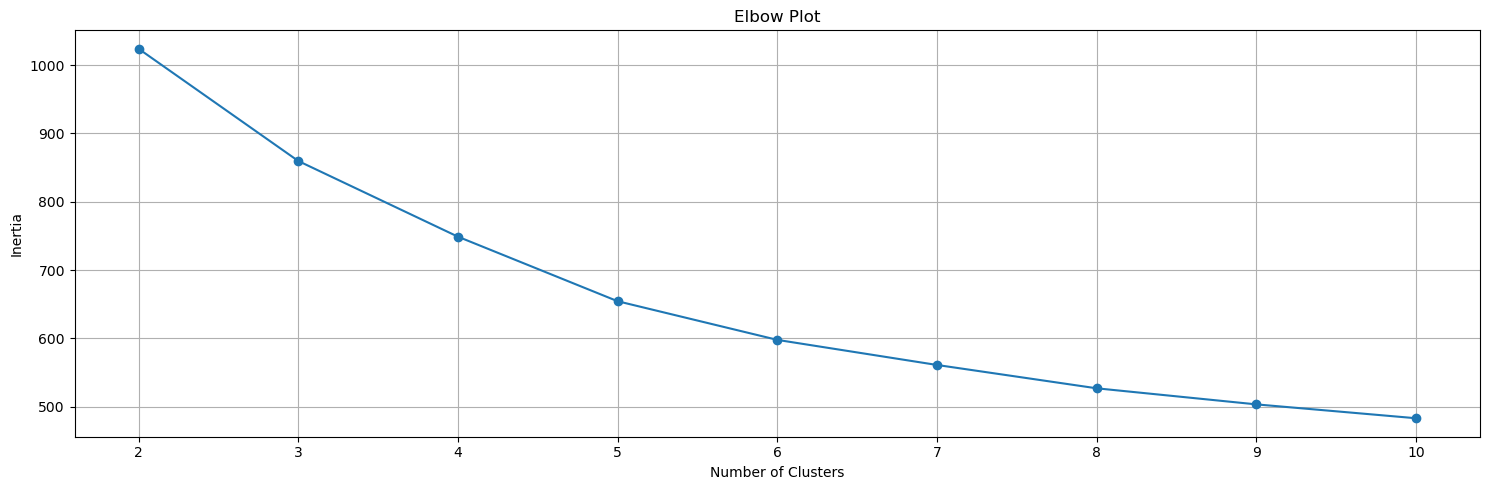

In [102]:
plt.figure(figsize=(15,5))
plt.plot(range(2, 11), inertias, marker='o')
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid() 
plt.tight_layout()
plt.show()

### Calinski-Harabasz Index vs. Number of Clusters

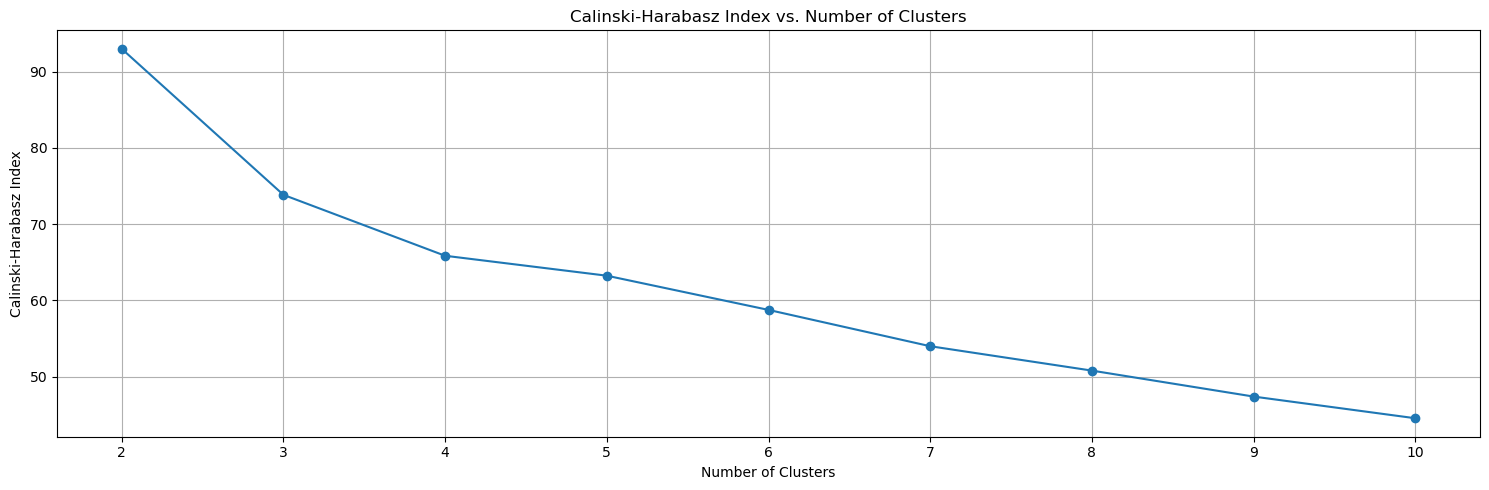

In [104]:
plt.figure(figsize=(15,5))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title("Calinski-Harabasz Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.grid() 
plt.tight_layout()
plt.show()

># Visualize clusters in 2D using PCA

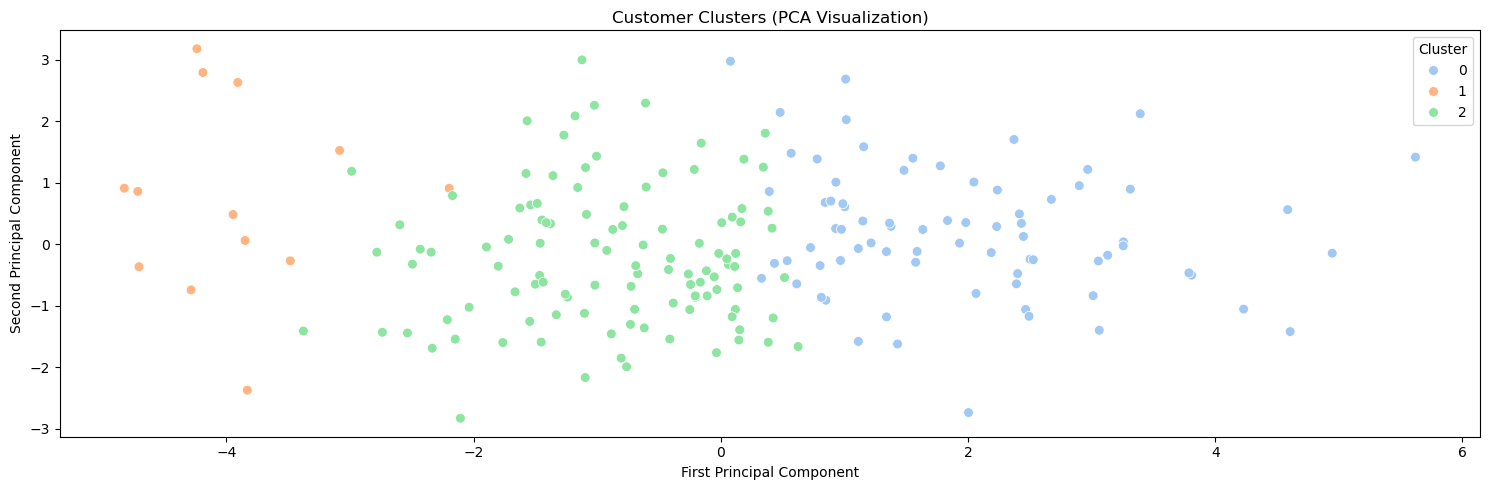

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
customer_data['PCA1'] = reduced_features[:, 0]
customer_data['PCA2'] = reduced_features[:, 1]

plt.figure(figsize=(15,5))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='pastel', s=50)
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title="Cluster", loc='upper right')
plt.tight_layout()
plt.show()

>## Top 5 contributing features for PC1 and PC2

In [108]:
import numpy as np
feature_names = features.columns
for i in range(2):
    print(f"\nPrincipal Component {i+1} Major Contributors:")
    sorted_idx = np.argsort(np.abs(pca.components_[i]))[::-1]
    for idx in sorted_idx[:5]:
        print(f"{feature_names[idx]}: {pca.components_[i][idx]:.3f}")


Principal Component 1 Major Contributors:
Frequency: 0.482
Quantity: 0.481
UniqueProducts: 0.473
TotalSpend: 0.462
Recency: -0.263

Principal Component 2 Major Contributors:
AvgTransaction: 0.733
Lifetime: -0.435
Recency: 0.365
TotalSpend: 0.308
UniqueProducts: -0.145


>## Summary of each cluster

In [110]:
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalSpend': ['mean', 'std', 'count'],
    'Frequency': ['mean', 'std'],
    'UniqueProducts': ['mean', 'std'],
    'Quantity': ['mean', 'std'],
    'Recency': ['mean', 'std'],
    'Lifetime': ['mean', 'std']
}).round(2).reset_index()

cluster_summary

Cluster TotalSpend             Frequency       UniqueProducts        \
                mean   std count      mean   std           mean   std   
0       0       0.94  0.76    77      0.97  0.67           0.95  0.67   
1       1      -1.51  0.30    13     -1.70  0.29          -1.70  0.30   
2       2      -0.49  0.53   109     -0.48  0.52          -0.47  0.55   

  Quantity       Recency       Lifetime        
      mean   std    mean   std     mean   std  
0     1.00  0.69   -0.23  0.67     0.03  1.01  
1    -1.54  0.44    2.67  1.02    -0.85  1.06  
2    -0.52  0.46   -0.16  0.70     0.08  0.95

>## Cluster characteristics

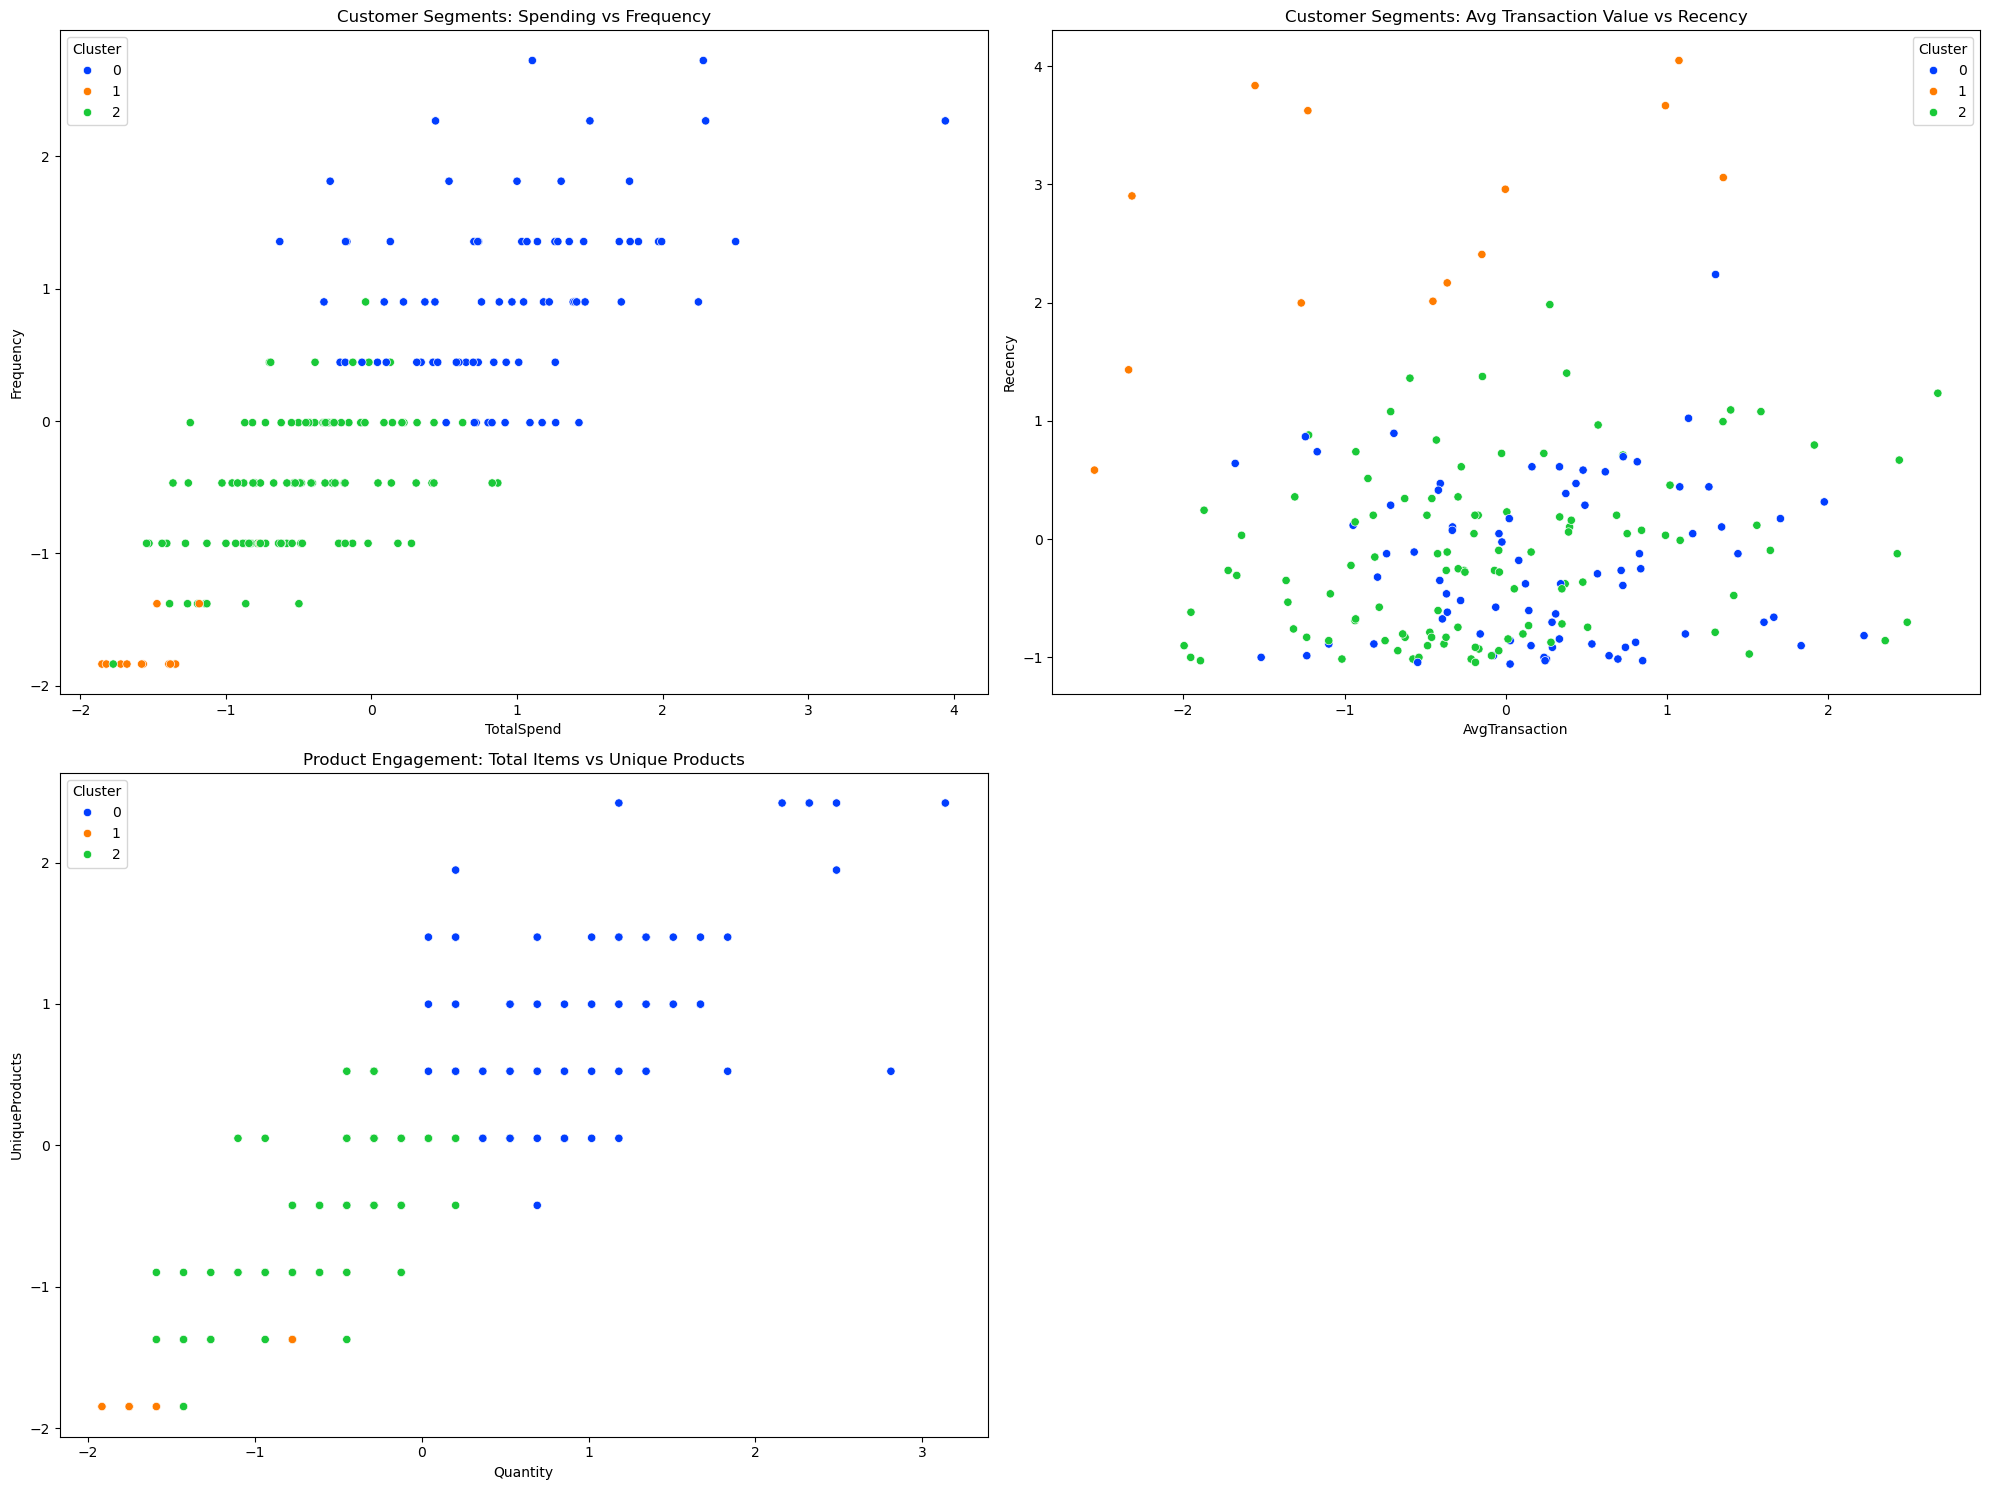

In [112]:
plt.figure(figsize=(20,15))

# Plot 1: Spending vs Frequency
plt.subplot(2, 2, 1)
sns.scatterplot(data=customer_data, x='TotalSpend', y='Frequency', 
               hue='Cluster', palette='bright')
plt.title('Customer Segments: Spending vs Frequency')

# Plot 2: Average Transaction Value vs Recency
plt.subplot(2, 2, 2)
sns.scatterplot(data=customer_data, x='AvgTransaction', y='Recency', 
               hue='Cluster', palette='bright')
plt.title('Customer Segments: Avg Transaction Value vs Recency')

# Plot 3: Product Diversity
plt.subplot(2, 2, 3)
sns.scatterplot(data=customer_data, x='Quantity', y='UniqueProducts',
               hue='Cluster', palette='bright')
plt.title('Product Engagement: Total Items vs Unique Products')

plt.tight_layout()
plt.show()

### Regional Distribution Standardaization

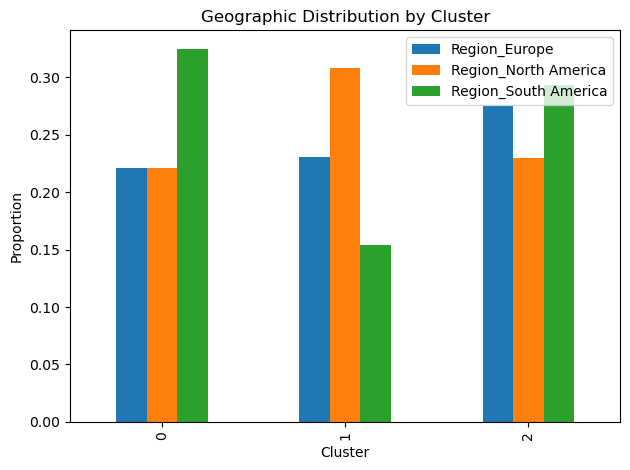

In [114]:
customer_data.groupby('Cluster')[
    ['Region_Europe', 'Region_North America', 'Region_South America']
].mean().plot(kind='bar')
plt.title('Geographic Distribution by Cluster')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()